# Web of science dataset

Kowsari, Kamran; Brown, Donald; Heidarysafa, Mojtaba ; Jafari Meimandi, Kiana ; Gerber, Matthew; Barnes, Laura (2018), “Web of Science Dataset”, Mendeley Data, V6, doi: 10.17632/9rw3vkcfy4.6

http://dx.doi.org/10.17632/9rw3vkcfy4.6


Meta-data:
This folder contain on data file as following attribute:
Y1	Y2	Y	Domain	area	keywords	Abstract

Abstract is input data that include text sequences of  46,985 published paper
- Y is target value 
- YL1 is target value of level one (parent label)
- YL2 is target value of level one (child label)
- Domain is major domain which include 7 labales: {Computer  Science,Electrical  Engineering,  Psychology,  Mechanical  Engineering,Civil  Engineering,  Medical  Science,  biochemistry}
- area is subdomain or area of the paper such as CS-> computer graphics which contain 134 labels.
- keywords : is authors keyword of the papers

In [1]:
%pylab inline
import pandas as pd
from clustering import *


plt.rcParams.update({
    "figure.dpi": 100,
    "figure.figsize": (4, 3),
    "figure.facecolor": "white", #"lightyellow",
    
    "savefig.dpi": 150,
    
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
    "font.size": 8,
    
    "lines.linewidth": 1,
    "lines.marker": "",
    "lines.markersize": 8,
    
    "axes.spines.left": False,
    "axes.spines.right": False,
    "axes.spines.top": False,
    "axes.edgecolor": "grey",
    "axes.labelsize": 8,
    "axes.labelcolor": "grey",
    "axes.facecolor": "#00000000",
    
    "xtick.color": "grey",
    "xtick.labelsize": 8,
    "xtick.major.size": 2,
    
    "ytick.major.size": 0,
    "ytick.color": "grey",
    "ytick.labelsize": 8,
    
    "text.color": "grey",
    "text.usetex": False
})

Populating the interactive namespace from numpy and matplotlib


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jameshoughton/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
wos = pd.read_excel("WOS/WebOfScience/Meta-data/Data.xlsx")
wos['Domain'] = wos['Domain'].apply(lambda x: x.strip())

wos['keys'] = wos['keywords'].apply(clean)
wos

,Y1,Y2,Y,Domain,area,keywords,Abstract,keys
0,0,12,12,CS,Symbolic computation,(2+1)-dimensional non-linear optical waves; e...,(2 + 1)-dimensional non-linear optical waves t...,"[solitoninteraction, erbiumdopedopticalfibre, ..."
1,5,2,74,Medical,Alzheimer's Disease,Aging; Tau; Amyloid; PET; Alzheimer's disease...,(beta-amyloid (A beta) and tau pathology becom...,"[polypathology, pet, alzheimersdisease, amyloi..."
2,4,7,68,Civil,Green Building,LED lighting system; PV system; Distributed l...,(D)ecreasing of energy consumption and environ...,"[pvsystem, distributedlightingcontrol, energye..."
3,1,10,26,ECE,Electric motor,NdFeB magnets; Electric motor; Electric vehic...,(Hybrid) electric vehicles are assumed to play...,"[electricmotor, electricvehicle, hybridelectri..."
4,5,43,115,Medical,Parkinson's Disease,Parkinson's disease; dyskinesia; adenosine A(...,"(L)-3,4-Dihydroxyphenylalanine ((L)-DOPA) rema...","[dyskinesia, glutamicaciddecarboxylase, striat..."
...,...,...,...,...,...,...,...,...
46980,5,50,122,Medical,Sports Injuries,Karate; Verletzungsrisiko; Sportverletzung; P...,Zusammenfassung Hintergrund: Karate erfreut si...,"[riskinjury, pravention, prevention, karate, s..."
46981,0,15,15,CS,Data structures,Z-Wave; Wireless; Embedded systems; Internet ...,Z-Wave is an implementation of home automation...,"[internetthingsforensicanalysis, zwave, wirele..."
46982,5,38,110,Medical,Cancer,Antifouling biosensor; Peptide; Electrochemis...,Zwitterionic peptides were anchored to a condu...,"[pedot, antifoulingbiosensor, cancerbiomarker,..."
46983,0,10,10,CS,Distributed computing,High Performance Computing; Parallel Computin...,ZY-3 has been acquiring high quality imagery s...,"[imagematching, highperformancecomputing, auto..."


In [6]:
for k, v in wos.groupby('Domain')['Domain'].count().items():
    print("%s (%i)"%(k,v), end=", ")

CS (6514), Civil (4237), ECE (5483), MAE (3297), Medical (14625), Psychology (7142), biochemistry (5687), 

In [4]:
# cluster using randomly selected pairs of keywords from each article, without replacement
thresholds=np.arange(0, 1.01, 0.025)

data_clustering_df = pd.DataFrame()
shuffled_clustering_df = pd.DataFrame()
node_shuffled_clustering_df = pd.DataFrame()

total_docs = 0
for domain in list(set(wos['Domain'].values)):
    print(domain)
    kw_df = wos[wos["Domain"]==domain]
    total_docs += len(kw_df)
    edges = create_weighted_edgelist(kw_df, method="pairs")
    data_clustering_df[domain] = compute_clusterings_by_threshold(edges, thresholds)
    
    shuffled_edges = shuffle_edgelist(edges)
    shuffled_clustering_df[domain] = compute_clusterings_by_threshold(shuffled_edges, thresholds)
    
pd.to_pickle([data_clustering_df, shuffled_clustering_df, total_docs],
             "WOS_clustering_pairs.pickle")

MAE
Medical
biochemistry
Civil
CS
Psychology
ECE


In [4]:
[data_clustering_df, shuffled_clustering_df, node_shuffled_clustering_df] = pd.read_pickle("WOS_clustering_pairs.pickle")

In [2]:
def plot_cluster_thresholds(data_clustering_df, shuffled_clustering_df, outfile=""):
    plt.plot([],[],'r', alpha=.6, label='Keyword Data')
    plt.plot([],[],'dimgrey', alpha=.6, label='Expected by chance')    
    plt.plot([],[],'k', alpha=1, label='"Effect Size"')    

    for col in data_clustering_df.columns:
        plt.plot(data_clustering_df.index, data_clustering_df[col] - shuffled_clustering_df[col], 
                 'k', linewidth=2)

    for col in data_clustering_df.columns:
        plt.plot(data_clustering_df.index, data_clustering_df[col], 'r', alpha=.4)

    for col in shuffled_clustering_df.columns:
        plt.plot(shuffled_clustering_df.index, shuffled_clustering_df[col], 'dimgrey', alpha=.4)      

    plt.xlabel('Top n% of Beliefs')
    plt.ylabel('Clustering Coefficient')
    plt.title('Popular academic keyword pairs form clusters')

    plt.xlabel("Top n% of keyword co-citations", fontsize=10)
    plt.ylabel("Clustering Coefficient", fontsize=10)
    plt.xticks([0, .10, .25, .50, .75, 1.00], [0, 10, 25, 50, 75, 100])

    plt.legend(framealpha=0, loc="center left", bbox_to_anchor=(.65,.5))
    plt.tight_layout()
    
    if len(outfile) > 0:
        plt.savefig(outfile)


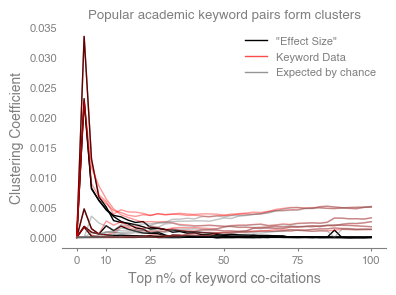

In [18]:
[data_clustering_df, shuffled_clustering_df, node_shuffled_clustering_df] = pd.read_pickle("WOS_clustering_pairs.pickle")

plt.plot([],[],'k', alpha=1, label='"Effect Size"')    
plt.plot([],[],'r', alpha=.7, label='Keyword Data')
plt.plot([],[],'dimgrey', alpha=.7, label='Expected by chance')    


for col in data_clustering_df.columns:
    plt.plot(data_clustering_df.index, data_clustering_df[col] - shuffled_clustering_df[col], 
             'k', linewidth=1)

for col in data_clustering_df.columns:
    plt.plot(data_clustering_df.index, data_clustering_df[col], 'r', alpha=.4)

for col in shuffled_clustering_df.columns:
    plt.plot(shuffled_clustering_df.index, shuffled_clustering_df[col], 'dimgrey', alpha=.4)      

plt.xlabel('Top n% of Beliefs')
plt.ylabel('Clustering Coefficient')
plt.title('Popular academic keyword pairs form clusters')

plt.xlabel("Top n% of keyword co-citations", fontsize=10)
plt.ylabel("Clustering Coefficient", fontsize=10)
plt.xticks([0, .10, .25, .50, .75, 1.00], [0, 10, 25, 50, 75, 100])

plt.legend(framealpha=0, loc="upper right")
plt.tight_layout()


plt.savefig("WOS_Pairwise_Clustering.png", dpi=300)



In [5]:
# cluster using all pairs of keywords from each article
thresholds=np.arange(0, 1.01, 0.05)

data_clustering_df = pd.DataFrame()
shuffled_clustering_df = pd.DataFrame()
node_shuffled_clustering_df = pd.DataFrame()

total_docs = 0
for domain in list(set(wos['Domain'].values)):
    print(domain)
    kw_df = wos[wos["Domain"]==domain]
    total_docs += len(kw_df)
    edges = create_weighted_edgelist(kw_df, method="all")
    data_clustering_df[domain] = compute_clusterings_by_threshold(edges, thresholds)
    
    shuffled_edges = shuffle_edgelist(edges)
    shuffled_clustering_df[domain] = compute_clusterings_by_threshold(shuffled_edges, thresholds)
    
pd.to_pickle([data_clustering_df, shuffled_clustering_df, total_docs],
             "WOS_clustering_all.pickle")

MAE
Medical
biochemistry
Civil
CS
Psychology
ECE


In [6]:
[data_clustering_df, shuffled_clustering_df, node_shuffled_clustering_df] = pd.read_pickle("WOS_clustering_all.pickle")

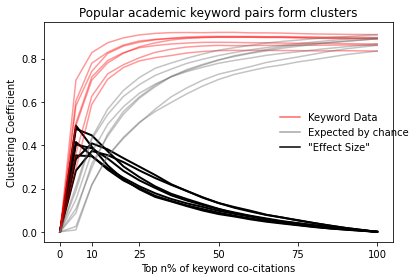

In [9]:
plot_cluster_thresholds(data_clustering_df, shuffled_clustering_df)